In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0000920112"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000920112
SIC,6022
Description,STATE COMMERCIAL BANKS
Name,HEARTLAND FINANCIAL USA INC
Ticker,HTLF


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,63.0,1.908349e+01,8.086608e+00,9.63,13.18,16.04,23.86,3.965000e+01
interest income,60.0,6.062945e+07,2.262033e+07,32571000.00,47772000.00,51073000.00,65897750.00,1.263030e+08
net income,67.0,9.943380e+06,8.225352e+06,-7875000.00,5171000.00,6874000.00,13818000.00,3.371000e+07
net interest income,66.0,4.304192e+07,2.643123e+07,22007.00,27228000.00,36040500.00,53490250.00,1.106780e+08
provision for loan losses,67.0,3.852466e+06,3.378121e+06,-502000.00,1452000.00,2553000.00,5348500.00,1.510600e+07


# Plots

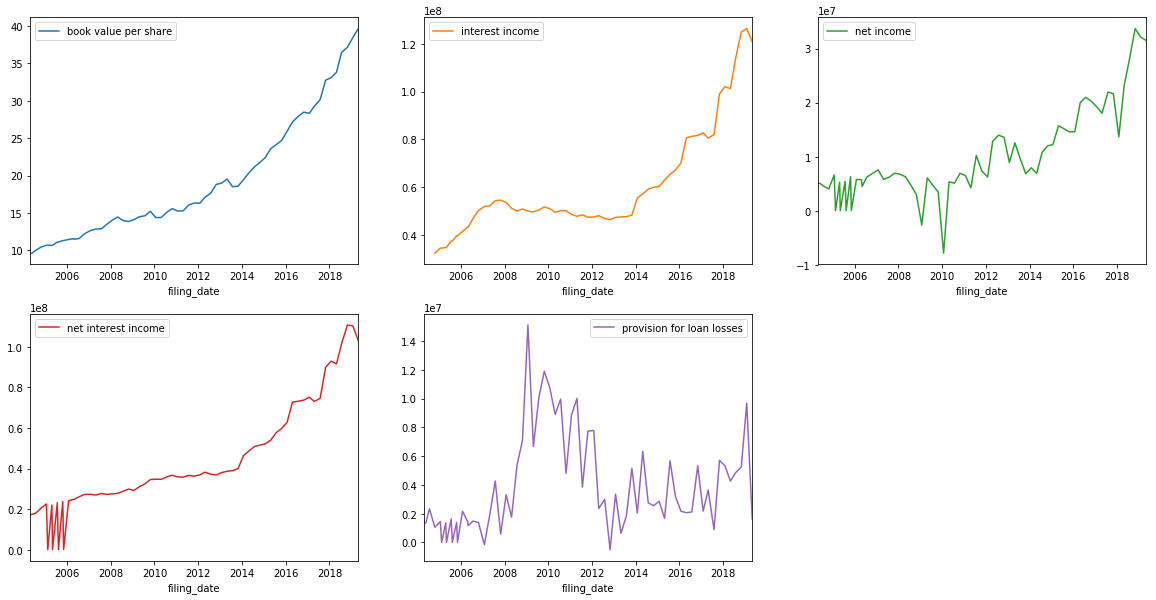

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period   msg_type  \
cik        item                                                                
0000920112 interest income            2004Q1 to 2004Q2: 2 periods    missing   
           net income                                      2004Q1  duplicate   
           net income                                      2004Q4  duplicate   
           net income                 2005Q2 to 2005Q3: 2 periods  duplicate   
           net interest income                             2004Q1  duplicate   
           net interest income                             2004Q4  duplicate   
           net interest income        2005Q2 to 2005Q3: 2 periods  duplicate   
           provision for loan losses                       2004Q1  duplicate   
           provision for loan losses                       2004Q4  duplicate   
           provision for loan losses  2005Q2 to 2005Q3: 2 periods  duplicate   
           total revenue                                     None      empty   

                                                 message  
cik        item                                           
0000920112 interest income                Missing period  
           net income                   Duplicate period  
           net income                   Duplicate period  
           net income                   Duplicate period  
           net interest income          Duplicate period  
           net interest income          Duplicate period  
           net interest income          Duplicate period  
           provision for loan losses    Duplicate period  
           provision for loan losses    Duplicate period  
           provision for loan losses    Duplicate period  
           total revenue              No values for item

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()